# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

`Initialization`

In [524]:
# Loading all the libraries

#loading pandas in orer to prepare data
import pandas as pd

# loading numpy 
import numpy as np

# loading stats in order to run statistical calculations
from scipy import stats as st

# loading library to plot charts
from matplotlib import pyplot as plt
import seaborn as sns

# loading libray to run math calculations if needed
from math import factorial

from functools import reduce
import math

# loading library for dates and deltas
from datetime import datetime
from dateutil import relativedelta
import calendar

`Load data`

In [525]:
# Load the data files into different DataFrames

# pulling data from the calls dataset and assigning it to a variable
calls = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Statistical Data Analysis/megaline_calls.csv')

# pulling data from the internet dataset and assigning it to a variable
internet = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Statistical Data Analysis/megaline_internet.csv')

# pulling data from the messages dataset and assigning it to a variable
messages = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Statistical Data Analysis/megaline_messages.csv')

# pulling data from the plans dataset and assigning it to a variable
plans = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Statistical Data Analysis/megaline_plans.csv')

# pulling data from the users dataset and assigning it to a variable
users = pd.read_csv('/Users/dani/Data Science/TripleTen Projects/Project Data/Statistical Data Analysis/megaline_users.csv')


`Prepare the data`

Time to break down each data set from it's respective CSV load. Separating each one, calling methods for general/statistical information and getting a sense of the overal DataFrame structure. This will give us a foundation to start with and we will amend as needed.

`plan data`

In [526]:
# Print the general/summary information about the 'plans' DataFrame

# reading general information of the DataFrame
plans.info() 

# reading statistical information of the DataFrame
plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [527]:
# Print a sample of data for plans

# reading sample data with the number of items to return set to 2 (two plans)
plans.sample(n=2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


After reviewing the data using various methods, we see that there are no null items and the dtypes match categorically.

**`Comments`**

Additional items/columns that might become of use as we go further down the analysis could be: 

1) A column with GBs instead of MBs (given we have the cost per GB already in the table)

2) Or, converting the extra GB cost to MBs so it aligns with the MB per month column

3) Being clearer with column names for the last three columns

4) Adding an identiying column like 'premium' and 'basic' for each plan

In [528]:
# adding a column to further describe the plans

plan_type = ['basic', 'premium']

plans['plan_type'] = plan_type

# adding a column converting the total MBs column into GBs

bites = [15, 30]

plans['gb_per_month_included'] = bites

# renaming columns
plans.rename(columns = {"usd_per_minute": "usd_per_minute_exceeded", 
                      'usd_per_message':'usd_per_message_exceeded',
                     'usd_per_gb':'usd_per_gb_exceeded'}, inplace = True)

display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb_exceeded,usd_per_message_exceeded,usd_per_minute_exceeded,plan_name,plan_type,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,basic,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,premium,30


`user data`

In [529]:
# Print the general/summary information about the users' DataFrame

# reading general information of the DataFrame
users.info() 

# reading statistical information of the DataFrame
users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [530]:
users.duplicated().sum()

0

In [531]:
users.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

In [532]:
users.isnull().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [533]:
df_miss = (users.isnull().sum() / len(users)) * 100
df_miss = df_miss.drop(df_miss[df_miss == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_miss})
missing_data.head(10)

,Missing Ratio
churn_date,93.2


In [534]:
# Print a sample of data for users

# reading sample data
users.sample(n=20, random_state=42)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
361,1361,Jacelyn,Hoffman,45,"Birmingham-Hoover, AL MSA",2018-04-14,surf,NaN
73,1073,Grady,Crawford,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-04-06,surf,NaN
374,1374,Ching,Watts,55,"Louisville/Jefferson County, KY-IN MSA",2018-02-14,surf,NaN
155,1155,Claude,Hahn,19,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-02-21,ultimate,NaN
104,1104,Thurman,Stephens,20,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-12-23,ultimate,NaN
394,1394,Alejandro,Carver,28,"Stockton, CA MSA",2018-01-16,surf,NaN
377,1377,Vallie,Conway,18,"Rochester, NY MSA",2018-03-27,surf,NaN
124,1124,Jenell,Navarro,48,"New Haven-Milford, CT MSA",2018-02-19,ultimate,NaN
68,1068,Marcel,Jimenez,47,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-29,surf,NaN
450,1450,Errol,Marquez,67,"Bakersfield, CA MSA",2018-06-16,ultimate,NaN


/var/folders/wc/6x35sr293njgq8g1xgc9fzlm0000gn/T/ipykernel_17100/524912452.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Smart', 'Ultra'])


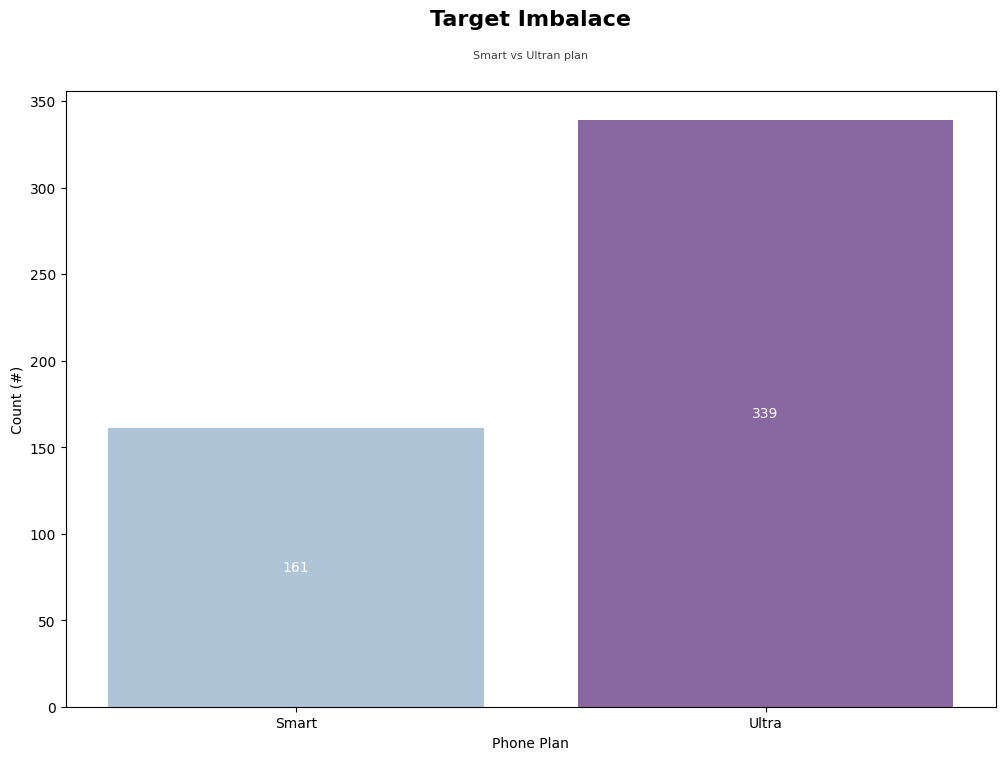

In [535]:
# checking for target imbalance
## amending this at start (balancing), would have yielded better results on the final evaluation
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=users, x='plan', palette="BuPu", ax=ax, hue='plan', legend=None)
ax.set(xlabel="Phone Plan", ylabel='Count (#)')
for c in ax.containers:
    labels = [f'{round((v.get_height())):,}' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', color='white')

ax.relim()  # the plot limits need to be updated with the moved bars
ax.autoscale()
ax.set_xticklabels(['Smart', 'Ultra'])
ax.text(x=0.5, y=1.1, s='Target Imbalace', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Smart vs Ultran plan', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

# sns.despine(offset=10,
#             trim=True
#             )
plt.show()

**`Comments`**

Right off the bat we can see that reg_date and churn_date is set as on object and churn_date has plenty of Nulls. While this can be seen as an error, the column description states that any Null value in this column means that the service is still being used. 

Other observations from the data:

1) Date columns are set as objects

2) Plenty of Null values under churn_date but those just explain if the service is live or not for each user (approximately 7% of service in this data set has been cancelled)

3) City column includes Metropolitan Statistical Areas which may be confusing to some
    
</div>

In [536]:
# amending the observated data type for both date columns

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**`Comments`**

Additional columns that might be useful:

1) Difference between reg_date v churn_date to see the time under contract for those who ended up cancelling the service. In days or months.

In [537]:
# Creating a new column which houses the delta between registration and cancellation date
    # naming it time_under_service and wil calculate the difference in days
    
days_delta = users['churn_date'] - users['reg_date']
    
users['days_under_service'] = days_delta

# Creating a column for months under service for comparison
    # if needing to convert new column to int, will need to replace NaT values
users['months_under_service'] = pd.DatetimeIndex(users['churn_date']).month - pd.DatetimeIndex(users['reg_date']).month

# another new column which specifies the cost based on plan name
users['plan_cost'] = np.where(users['plan'] == 'surf', '20' , '70').astype(int)

users.info()
display(users.sample(n=40))

# user check per plan
#surf_users = users[users['plan'] == 'surf'].count()
#ultimate_users = users[users['plan'] == 'ultimate'].count()
#total_users = surf_users + ultimate_users
#print(surf_users/total_users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   user_id               500 non-null    int64          
 1   first_name            500 non-null    object         
 2   last_name             500 non-null    object         
 3   age                   500 non-null    int64          
 4   city                  500 non-null    object         
 5   reg_date              500 non-null    datetime64[ns] 
 6   plan                  500 non-null    object         
 7   churn_date            34 non-null     datetime64[ns] 
 8   days_under_service    34 non-null     timedelta64[ns]
 9   months_under_service  34 non-null     float64        
 10  plan_cost             500 non-null    int64          
dtypes: datetime64[ns](2), float64(1), int64(3), object(4), timedelta64[ns](1)
memory usage: 43.1+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,days_under_service,months_under_service,plan_cost
328,1328,Tamesha,Huber,20,"Minneapolis-St. Paul-Bloomington, MN-WI MSA",2018-02-10,surf,NaT,NaT,NaN,20
115,1115,Yevette,Yang,21,"El Paso, TX MSA",2018-11-19,surf,NaT,NaT,NaN,20
414,1414,Georgianne,Herring,30,"Urban Honolulu, HI MSA",2018-03-03,surf,2018-09-01,182 days,6.0,20
92,1092,Taren,Strickland,26,"Dallas-Fort Worth-Arlington, TX MSA",2018-12-10,surf,NaT,NaT,NaN,20
289,1289,Steve,Blair,47,"Detroit-Warren-Dearborn, MI MSA",2018-11-12,ultimate,NaT,NaT,NaN,70
343,1343,Teresia,Ewing,43,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-08-23,surf,NaT,NaT,NaN,20
41,1041,Drucilla,Lynn,58,"Las Vegas-Henderson-Paradise, NV MSA",2018-03-17,ultimate,NaT,NaT,NaN,70
17,1017,Boris,Gates,61,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-08-26,surf,NaT,NaT,NaN,20
294,1294,Demetrius,Russo,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,NaT,NaT,NaN,20
197,1197,Lon,Parker,56,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,surf,NaT,NaT,NaN,20


`call data`

In [538]:
# Print the general/summary information about the calls' DataFrame

# reading general information of the DataFrame
calls.info() 

# reading statistical information of the DataFrame
calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [539]:
calls.duplicated().sum()

0

In [540]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [541]:
# Print a sample of data for calls

# reading sample data
calls.sample(n=20, random_state=42)

,id,user_id,call_date,duration
52288,1187_481,1187,2018-12-12,0.00
30634,1114_568,1114,2018-10-21,1.05
54228,1196_106,1196,2018-07-23,5.67
110372,1389_454,1389,2018-05-12,11.49
109600,1386_60,1386,2018-11-24,0.00
87094,1320_763,1320,2018-06-23,3.84
67527,1242_23,1242,2018-11-15,13.67
9557,1042_494,1042,2018-11-05,7.10
104970,1369_55,1369,2018-12-28,0.00
124419,1439_287,1439,2018-08-16,8.32


**`Comments`**

The sample data for the calls table shows a few things:

1) ID, the unique call identifier, is set as an object which could become an issue and the column name shoud be a bit more clearer.

2) call_date should be reassigned to a datetime dtype.

Fixing the calls table by:

1) Leaving id as object for now but might revisit. Perhaps we can leave the numbers after the "_" and convert to int?

    a) Renaming the column to call_id though. 

2) Changing call_date to datetime.

In [542]:
# amending the observated data type for date column

calls['call_date'] = pd.to_datetime(calls['call_date'])

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**`Comments`**

Useful areas of enrichment for the calls table:

1) Renaming id column to call_id.

2) Renaming duration column to duration_mins.

3) Creating a new colum with duration minutes rounded up to the nearest decimal.

4) Creating a month column for further analysis.

In [543]:
# renaming 2 columns to be more explicit to what they actually mean
    # id = call_id
    # duration = duration_mins

calls.rename(columns = {"id": "call_id", 
                      'duration':'duration_mins'}, 
                        inplace = True)

# creating a new column that rounds up duration minutes, assigning it to an int dtype
    ## this was part of the project description so making sure it's rounded up!
calls['duration_mins_rounded'] = np.ceil(calls['duration_mins']).astype(int)

# creating a new column that breaks out each month from the message_date column for use in further analyses
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
    #converting int month to abbreviatied name
calls['month_str'] = calls['month'].apply(lambda x: calendar.month_abbr[x])

display(calls)

display(calls[calls['user_id'] == 1000]['duration_mins_rounded'].sum())

,call_id,user_id,call_date,duration_mins,duration_mins_rounded,month,month_str
0,1000_93,1000,2018-12-27,8.52,9,12,Dec
1,1000_145,1000,2018-12-27,13.66,14,12,Dec
2,1000_247,1000,2018-12-27,14.48,15,12,Dec
3,1000_309,1000,2018-12-28,5.76,6,12,Dec
4,1000_380,1000,2018-12-30,4.22,5,12,Dec
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,11,Nov
137731,1499_200,1499,2018-10-20,10.89,11,10,Oct
137732,1499_201,1499,2018-09-21,8.12,9,9,Sep
137733,1499_202,1499,2018-10-10,0.37,1,10,Oct


124

`message data`

In [544]:
# Print the general/summary information about the messages' DataFrame

# reading general information of the DataFrame
messages.info() 

# reading statistical information of the DataFrame
messages.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [545]:
# Print a sample of data for messages

messages.sample(n=20, random_state=42)

,id,user_id,message_date
58331,1369_132,1369,2018-12-27
24196,1145_51,1145,2018-07-11
9284,1069_42,1069,2018-12-03
44214,1293_1181,1293,2018-10-06
57006,1362_72,1362,2018-05-25
65485,1421_70,1421,2018-12-21
10405,1076_916,1076,2018-11-23
36070,1237_91,1237,2018-09-02
31581,1196_64,1196,2018-06-27
15257,1101_314,1101,2018-12-16


In [546]:
messages.duplicated().sum()

0

In [547]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

**`Comments`**

Noticing that the dtype for id is similar to the previous data set so reinforces my thoughts of leaving it as is (object).

Will need to correct message_date as it's saved as an object.

**Making the assumption that the data set considers sent message volume only.**
    
Obvious discrepancy here message_date not being assigned the correct dtype. Resssigning to datetime dtype.

In [548]:
# amending the observated data type for date column

messages['message_date'] = pd.to_datetime(messages['message_date'])

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**`Comments`**

Similar to the previous data set:

1) Renaming id to message_id to be clearer.

2) Creating a new column with the Month from message_date since all the dates fall under the year 2018.

In [549]:
# renaming 1 column to be more explicit to what they actually mean
    # id = message_id

messages.rename(columns = {"id": "message_id"}, 
                        inplace = True)

# creating a new column that breaks out each month from the message_date column for use in further analyses
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
    #converting int month to abbreviatied name
messages['month_str'] = messages['month'].apply(lambda x: calendar.month_abbr[x])

display(messages)

,message_id,user_id,message_date,month,month_str
0,1000_125,1000,2018-12-27,12,Dec
1,1000_160,1000,2018-12-31,12,Dec
2,1000_223,1000,2018-12-31,12,Dec
3,1000_251,1000,2018-12-27,12,Dec
4,1000_255,1000,2018-12-26,12,Dec
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,Dec
76047,1497_536,1497,2018-12-24,12,Dec
76048,1497_547,1497,2018-12-31,12,Dec
76049,1497_558,1497,2018-12-24,12,Dec


`internet data`

In [550]:
# Print the general/summary information about the internet DataFrame

# reading general information of the DataFrame
internet.info() 

# reading statistical information of the DataFrame
internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [551]:
# Print a sample of data for the internet traffic

internet.sample(n=20, random_state=42)

,id,user_id,session_date,mb_used
102423,1490_238,1490,2018-10-15,373.01
12472,1060_181,1060,2018-09-14,875.38
91959,1426_53,1426,2018-12-29,627.48
42208,1187_385,1187,2018-09-20,132.80
64201,1294_122,1294,2018-10-29,397.70
51936,1233_16,1233,2018-10-23,241.69
97479,1460_2,1460,2018-06-16,783.37
35337,1160_41,1160,2018-09-02,0.00
69100,1322_13,1322,2018-11-27,620.49
21688,1099_443,1099,2018-07-03,714.42


In [552]:
internet.duplicated().sum()

0

In [553]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

**`Comments`**

1. Usual observations with id column needing to be renamed and date column being assigned as an object dtype as opposed to datetime. 

2. MBs used contain 0s which signal that no data was used on that specific period.

3. Thematic fix for each data set so far, reassigning date column to a datetime dtype.


In [554]:
# amending the observated data type for date column

internet['session_date'] = pd.to_datetime(internet['session_date'])

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**`Comments`**

Observed areas of enrichment:

1) Clearer id column, renaming to internet_session_id.

2) New column breaking out the month of each session during the year.

In [555]:
# renaming 1 column to be more explicit to what they actually mean
    # id = internet_session_id

internet.rename(columns = {"id": "internet_session_id"}, 
                        inplace = True)

# creating a new column that breaks out each month from the message_date column for use in further analyses
    # aiming to create a graph that calls out the mb density in each month
    # will leverage for total sum on volume of data used for eachf month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
    #converting int month to abbreviatied name
internet['month_str'] = internet['month'].apply(lambda x: calendar.month_abbr[x])

display(internet)

,internet_session_id,user_id,session_date,mb_used,month,month_str
0,1000_13,1000,2018-12-29,89.86,12,Dec
1,1000_204,1000,2018-12-31,0.00,12,Dec
2,1000_379,1000,2018-12-28,660.40,12,Dec
3,1000_413,1000,2018-12-26,270.99,12,Dec
4,1000_442,1000,2018-12-27,880.22,12,Dec
...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,Oct
104821,1499_216,1499,2018-12-30,304.72,12,Dec
104822,1499_217,1499,2018-09-22,292.75,9,Sep
104823,1499_218,1499,2018-12-07,0.00,12,Dec


`Studying plan conditions`

In [556]:
# Print out the plan conditions and make sure they are clear for you

display(plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb_exceeded,usd_per_message_exceeded,usd_per_minute_exceeded,plan_name,plan_type,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,basic,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,premium,30


**`Comments`**

Aggregating data by user_id and month with `.value_counts()` and `.sum()`.

In [557]:
# Calculate the number of calls made by each user per month. Save the result.

## original calculation which grouped by month (string form)
#call_per_user = calls.groupby('user_id')['month'].value_counts()

## new calculation 
call_per_user = calls.groupby(['user_id','month','month_str']).agg({'call_id':'count'}).rename(columns={'call_id':'calls_per_month'}).reset_index()
## inserting plan information to each row
call_merge = call_per_user.merge(users[['user_id','plan']], on='user_id', how='left')

call_df = pd.DataFrame(call_merge)

display(call_df)

# table leveraged for graphs
calls_bar = calls.merge(users[['user_id','plan']], on='user_id',
                        how='left')

,user_id,month,month_str,calls_per_month,plan
0,1000,12,Dec,16,ultimate
1,1001,8,Aug,27,surf
2,1001,9,Sep,49,surf
3,1001,10,Oct,65,surf
4,1001,11,Nov,64,surf
...,...,...,...,...,...
2253,1498,12,Dec,39,surf
2254,1499,9,Sep,41,surf
2255,1499,10,Oct,53,surf
2256,1499,11,Nov,45,surf


In [558]:
# Calculate the amount of minutes spent by each user per month. Save the result.

## original calculation which grouped by month (string form)
#minutes_per_user = calls.groupby(['user_id', 'month'])['duration_mins_rounded'].sum()

## new calc
minutes_per_user = calls.groupby(['user_id','month','month_str']).agg({'duration_mins_rounded':'sum'}).rename(columns={'duration_mins_rounded':'minutes_spent'}).reset_index()

## inserting plan information to each row
minute_merge = minutes_per_user.merge(users[['user_id','plan']], on='user_id', how='left')

minutes_df = pd.DataFrame(minute_merge)
display(minutes_df)

# tables leveraged for graphs
minutes_per = calls_bar.groupby(['plan','month_str'])['duration_mins_rounded'].mean().reset_index()
#display(minutes_per)

minutes_bar = minutes_df.drop(['user_id','month'],axis=1).rename(columns={'minutes_spent':'value'})
#display(minutes_bar)

,user_id,month,month_str,minutes_spent,plan
0,1000,12,Dec,124,ultimate
1,1001,8,Aug,182,surf
2,1001,9,Sep,315,surf
3,1001,10,Oct,393,surf
4,1001,11,Nov,426,surf
...,...,...,...,...,...
2253,1498,12,Dec,339,surf
2254,1499,9,Sep,346,surf
2255,1499,10,Oct,385,surf
2256,1499,11,Nov,308,surf


In [559]:
# Calculate the number of messages sent by each user per month. Save the result.

## original calculation which grouped by month (string form)
#messages_per_user = messages.groupby('user_id')['month'].value_counts()

## new calc
messages_per_user = messages.groupby(['user_id','month','month_str']).agg({'message_id':'count'}).rename(columns={'message_id':'messages_sent'}).reset_index()

## inserting plan information to each row
messages_merge = messages_per_user.merge(users[['user_id','plan']], on='user_id', how='left')

messages_df = pd.DataFrame(messages_merge)
display(messages_df)

# tables leveraged for graphs
messages_per = messages_df.groupby(['plan','month_str'])['messages_sent'].sum().reset_index()
#display(messages_per)
#display(messages_per_user)

messages_bar = messages_df.drop(['user_id','month'],axis=1).rename(columns={'messages_sent':'value'})
#display(messages_bar)

#checking for missing IDs (not part of call DF)
missing_ids = [1025,1080,1089,1108,1121,1129,1131,1137,1143,1194,1204,1269,1275,1307,1319,1349,1378,1463,1473]
#display(messages_df[messages_df['user_id'].isin(missing_ids)].reset_index())
missing_messages = messages_df[messages_df['user_id'].isin(missing_ids)]

#merging the data to account for missing IDs
messages_merge_df = messages_df.merge(missing_messages['user_id'], on='user_id', how='left')
display(messages_merge_df)

# additional check
#display(messages_merge_df[messages_merge_df['user_id'] == 1080])


,user_id,month,month_str,messages_sent,plan
0,1000,12,Dec,11,ultimate
1,1001,8,Aug,30,surf
2,1001,9,Sep,44,surf
3,1001,10,Oct,53,surf
4,1001,11,Nov,36,surf
...,...,...,...,...,...
1801,1496,9,Sep,21,surf
1802,1496,10,Oct,18,surf
1803,1496,11,Nov,13,surf
1804,1496,12,Dec,11,surf


,user_id,month,month_str,messages_sent,plan
0,1000,12,Dec,11,ultimate
1,1001,8,Aug,30,surf
2,1001,9,Sep,44,surf
3,1001,10,Oct,53,surf
4,1001,11,Nov,36,surf
...,...,...,...,...,...
1913,1496,9,Sep,21,surf
1914,1496,10,Oct,18,surf
1915,1496,11,Nov,13,surf
1916,1496,12,Dec,11,surf


In [560]:
# Calculate the volume of internet traffic used by each user per month. Save the result.

## original calculation which grouped by month (string form)
#mb_per_user = internet.groupby(['user_id', 'month'])['mb_used'].sum()

## new calc
mb_per_user = internet.groupby(['user_id','month','month_str']).agg({'mb_used':'sum'}).rename(columns={'month':'month_num'}).reset_index()

## inserting plan information to each row
mb_merge = mb_per_user.merge(users[['user_id','plan']], on='user_id', how='left')

mb_df = pd.DataFrame(mb_merge)

display(mb_df)

#per plan/leveraged for graphs
mb_per = mb_df.groupby(['plan','month_str'])['mb_used'].sum().reset_index()
#display(mb_per)

#per plan/area
mb_per_region = internet.groupby(['user_id','month_str']).agg({'mb_used':'sum'}).reset_index()
mb_region_merge = mb_per_region.merge(users[['user_id','plan','city']], on='user_id', how='left')
mb_region_df = pd.DataFrame(mb_region_merge)
#display(mb_region_df)

#checking for missing IDs (not part of call DF)
missing_ids = [1025,1080,1089,1108,1121,1129,1131,1137,1143,1194,1204,1269,1275,1307,1319,1349,1378,1463,1473]
#display(messages_df[messages_df['user_id'].isin(missing_ids)].reset_index())
missing_mega = mb_df[mb_df['user_id'].isin(missing_ids)]

#merging the data to account for missing IDs
mb_merge_df = mb_df.merge(missing_mega['user_id'], on='user_id', how='left')
display(mb_merge_df)

# additional check
#display(mb_merge_df[mb_merge_df['user_id'] == 1080])

,user_id,month,month_str,mb_used,plan
0,1000,12,Dec,1901.47,ultimate
1,1001,8,Aug,6919.15,surf
2,1001,9,Sep,13314.82,surf
3,1001,10,Oct,22330.49,surf
4,1001,11,Nov,18504.30,surf
...,...,...,...,...,...
2272,1498,12,Dec,23137.69,surf
2273,1499,9,Sep,12984.76,surf
2274,1499,10,Oct,19492.43,surf
2275,1499,11,Nov,16813.83,surf


,user_id,month,month_str,mb_used,plan
0,1000,12,Dec,1901.47,ultimate
1,1001,8,Aug,6919.15,surf
2,1001,9,Sep,13314.82,surf
3,1001,10,Oct,22330.49,surf
4,1001,11,Nov,18504.30,surf
...,...,...,...,...,...
2384,1498,12,Dec,23137.69,surf
2385,1499,9,Sep,12984.76,surf
2386,1499,10,Oct,19492.43,surf
2387,1499,11,Nov,16813.83,surf


**`Comments`**

Merging all data into one df to review the last few data frames we aggregated with their common identifiers and to see what each customer is consuming per month.

In [561]:
# Merge the data for calls, minutes, messages, internet based on user_id and month

# old calcs/attempts
#megaline_df = mb_df.merge(minutes_df, left_index=True, right_index=True).merge(messages_df, left_index=True, right_index=True).merge(call_df, left_index=True, right_index=True)
#megaline_df = pd.concat(data_frames, axis=1)

## new calc
megaline_df = call_df.merge(minutes_df,on=['user_id','month','month_str','plan'], how='left')\
.merge(messages_merge_df,on=['user_id','month','month_str','plan'], how='left').merge(mb_merge_df,on=['user_id','month','month_str','plan'], how='left')

display(megaline_df)

## testing new strategy
mega_df = pd.merge(
    pd.merge(pd.merge(mb_merge_df, messages_merge_df, on=['user_id','month','month_str','plan'], how='outer'),
    minutes_df,on=['user_id','month','month_str','plan'], how='outer'),
    call_df,on=['user_id','month','month_str','plan'], how='outer').fillna(0)
display(mega_df)

## check on larger merged dataframe, 1081 is present in calls DF but not in MB DF - found in merged DF
#display(mega_df1[mega_df1['user_id'] == 1081])

,user_id,month,month_str,calls_per_month,plan,minutes_spent,messages_sent,mb_used
0,1000,12,Dec,16,ultimate,124,11.0,1901.47
1,1001,8,Aug,27,surf,182,30.0,6919.15
2,1001,9,Sep,49,surf,315,44.0,13314.82
3,1001,10,Oct,65,surf,393,53.0,22330.49
4,1001,11,Nov,64,surf,426,36.0,18504.30
...,...,...,...,...,...,...,...,...
2253,1498,12,Dec,39,surf,339,NaN,23137.69
2254,1499,9,Sep,41,surf,346,NaN,12984.76
2255,1499,10,Oct,53,surf,385,NaN,19492.43
2256,1499,11,Nov,45,surf,308,NaN,16813.83


,user_id,month,month_str,mb_used,plan,messages_sent,minutes_spent,calls_per_month
0,1000,12,Dec,1901.47,ultimate,11.0,124.0,16.0
1,1001,8,Aug,6919.15,surf,30.0,182.0,27.0
2,1001,9,Sep,13314.82,surf,44.0,315.0,49.0
3,1001,10,Oct,22330.49,surf,53.0,393.0,65.0
4,1001,11,Nov,18504.30,surf,36.0,426.0,64.0
...,...,...,...,...,...,...,...,...
3092,1470,12,Dec,0.00,surf,153.0,592.0,78.0
3093,1482,10,Oct,0.00,ultimate,2.0,0.0,0.0
3094,1484,11,Nov,0.00,surf,1.0,38.0,2.0
3095,1491,4,Apr,0.00,surf,6.0,44.0,8.0


In [562]:
# Add the plan information

# following a few steps:
    # adding the users category to the aggregated DataFrame to get the plan name
    # creating new columns for each allowance metric associate with each plan

#megaline_df = megaline_df.merge(users[['user_id','month_str']], on='user_id', how='left')
#display(megaline_df)
#display(plans)

#creating new columns and specifying allowance balances for each plan
megaline_df['minute_allowance'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['minutes_included'][0], plans['minutes_included'][1]).astype('int')

megaline_df['message_allowance'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['messages_included'][0], plans['messages_included'][1]).astype('int')

megaline_df['data_allowance'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['mb_per_month_included'][0], plans['mb_per_month_included'][1]).astype('int')

megaline_df['monthly_cost'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['usd_monthly_pay'][0], plans['usd_monthly_pay'][1]).astype('int')

megaline_df['minute_overage'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['usd_per_minute_exceeded'][0], plans['usd_per_minute_exceeded'][1]).astype('float')

megaline_df['message_overage'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['usd_per_message_exceeded'][0], plans['usd_per_message_exceeded'][1]).astype('float')

megaline_df['mb_overage_per_1024'] = np.where(megaline_df.loc[:,'plan'] == 'surf',
                                    plans['usd_per_gb_exceeded'][0], plans['usd_per_gb_exceeded'][1]).astype('int')

#display(megaline_df)


# taking into account NaN values for each parameter
megaline_df['calls_per_month'].fillna(0,inplace=True)
megaline_df['minutes_spent'].fillna(0,inplace=True)
megaline_df['messages_sent'].fillna(0,inplace=True)
megaline_df['mb_used'].fillna(0,inplace=True)


# rounding all megabytes used to the next 1000
## removed rounding from DF to get a better sense of the data in the following tables
#megaline_df['mb_used'] = megaline_df['mb_used'].apply(lambda x: np.ceil(x/1000) * 1000).astype(int)

display(megaline_df)

#megaline_df.info()


,user_id,month,month_str,calls_per_month,plan,minutes_spent,messages_sent,mb_used,minute_allowance,message_allowance,data_allowance,monthly_cost,minute_overage,message_overage,mb_overage_per_1024
0,1000,12,Dec,16,ultimate,124,11.0,1901.47,3000,1000,30720,70,0.01,0.01,7
1,1001,8,Aug,27,surf,182,30.0,6919.15,500,50,15360,20,0.03,0.03,10
2,1001,9,Sep,49,surf,315,44.0,13314.82,500,50,15360,20,0.03,0.03,10
3,1001,10,Oct,65,surf,393,53.0,22330.49,500,50,15360,20,0.03,0.03,10
4,1001,11,Nov,64,surf,426,36.0,18504.30,500,50,15360,20,0.03,0.03,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,Dec,39,surf,339,0.0,23137.69,500,50,15360,20,0.03,0.03,10
2254,1499,9,Sep,41,surf,346,0.0,12984.76,500,50,15360,20,0.03,0.03,10
2255,1499,10,Oct,53,surf,385,0.0,19492.43,500,50,15360,20,0.03,0.03,10
2256,1499,11,Nov,45,surf,308,0.0,16813.83,500,50,15360,20,0.03,0.03,10


In [563]:
# Calculate the monthly revenue for each user

# creating a df with aggregate sums for each column we will be analyzing, may have to convert to mean() later down the road
#revenue_df = megaline_df.groupby('user_id').agg({'minutes_spent': "sum", 'messages_sent': "sum" , 'mb_used': "sum"})
#display(revenue_df)

revenue_df = megaline_df

##### checks
#display(megaline_df.loc[megaline_df["user_id"] == 1000])
#display(megaline_df['monthly_cost'])

# calculating the revenue for each parameter using np.where()
revenue_df['call_revenue'] = revenue_df['minutes_spent'].where(
    revenue_df['minutes_spent'] <= megaline_df['minute_allowance'], 
    (revenue_df['minutes_spent'] - megaline_df['minute_allowance']) * megaline_df['minute_overage'])

# conditional to remove values when customer is under the allowance/limit
revenue_df["call_revenue"] = np.where(
    megaline_df['minute_allowance'] >= revenue_df['minutes_spent'], 0, revenue_df["call_revenue"].apply(lambda x: np.ceil(x)).astype(int))


#revenue_df = revenue_df.loc[revenue_df["minutes_spent"] <= revenue_df["minute_limit"]]

# calculating the revenue for each parameter using np.where()
revenue_df['text_revenue'] = revenue_df['messages_sent'].where(
    revenue_df['messages_sent'] <= megaline_df['message_allowance'], 
    (revenue_df['messages_sent'] - megaline_df['message_allowance']) * megaline_df['message_overage'])

# conditional to remove values when customer is under the allowance/limit
revenue_df["text_revenue"] = np.where(
    megaline_df['message_allowance'] >= revenue_df['messages_sent'], 0, revenue_df["text_revenue"].apply(lambda x: np.ceil(x)).astype(int))

# calculating the revenue for each parameter using np.where()
revenue_df['data_revenue'] = revenue_df['mb_used'].where(
    revenue_df['mb_used'] <= megaline_df['data_allowance'], 
    (revenue_df['mb_used'] - megaline_df['data_allowance']) / 1000 * (megaline_df['mb_overage_per_1024']))

# conditional to remove values when customer is under the allowance/limit
revenue_df["data_revenue"] = np.where(
    megaline_df['data_allowance'] >= revenue_df['mb_used'], 0, revenue_df["data_revenue"])


# creating a total revenue column to house all calculations we just performed on the df
total_rev = revenue_df['call_revenue'] + revenue_df['text_revenue'] + revenue_df['data_revenue']

# total revenue per customer for all of 2018
revenue_df['total_user_average_rev'] = total_rev.apply(lambda x: np.ceil(x)).astype(int) + revenue_df['monthly_cost']

display(revenue_df)

# check
#missing_ids = [1025,1080,1089,1108,1121,1129,1131,1137,1143,1194,1204,1269,1275,1307,1319,1349,1378,1463,1473]
#display(revenue_df[revenue_df['user_id'].isin(missing_ids)])

,user_id,month,month_str,calls_per_month,plan,minutes_spent,messages_sent,mb_used,minute_allowance,message_allowance,data_allowance,monthly_cost,minute_overage,message_overage,mb_overage_per_1024,call_revenue,text_revenue,data_revenue,total_user_average_rev
0,1000,12,Dec,16,ultimate,124,11.0,1901.47,3000,1000,30720,70,0.01,0.01,7,0,0,0.0000,70
1,1001,8,Aug,27,surf,182,30.0,6919.15,500,50,15360,20,0.03,0.03,10,0,0,0.0000,20
2,1001,9,Sep,49,surf,315,44.0,13314.82,500,50,15360,20,0.03,0.03,10,0,0,0.0000,20
3,1001,10,Oct,65,surf,393,53.0,22330.49,500,50,15360,20,0.03,0.03,10,0,1,69.7049,91
4,1001,11,Nov,64,surf,426,36.0,18504.30,500,50,15360,20,0.03,0.03,10,0,0,31.4430,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,1498,12,Dec,39,surf,339,0.0,23137.69,500,50,15360,20,0.03,0.03,10,0,0,77.7769,98
2254,1499,9,Sep,41,surf,346,0.0,12984.76,500,50,15360,20,0.03,0.03,10,0,0,0.0000,20
2255,1499,10,Oct,53,surf,385,0.0,19492.43,500,50,15360,20,0.03,0.03,10,0,0,41.3243,62
2256,1499,11,Nov,45,surf,308,0.0,16813.83,500,50,15360,20,0.03,0.03,10,0,0,14.5383,35


`Studying user behaviour`

**Calls**

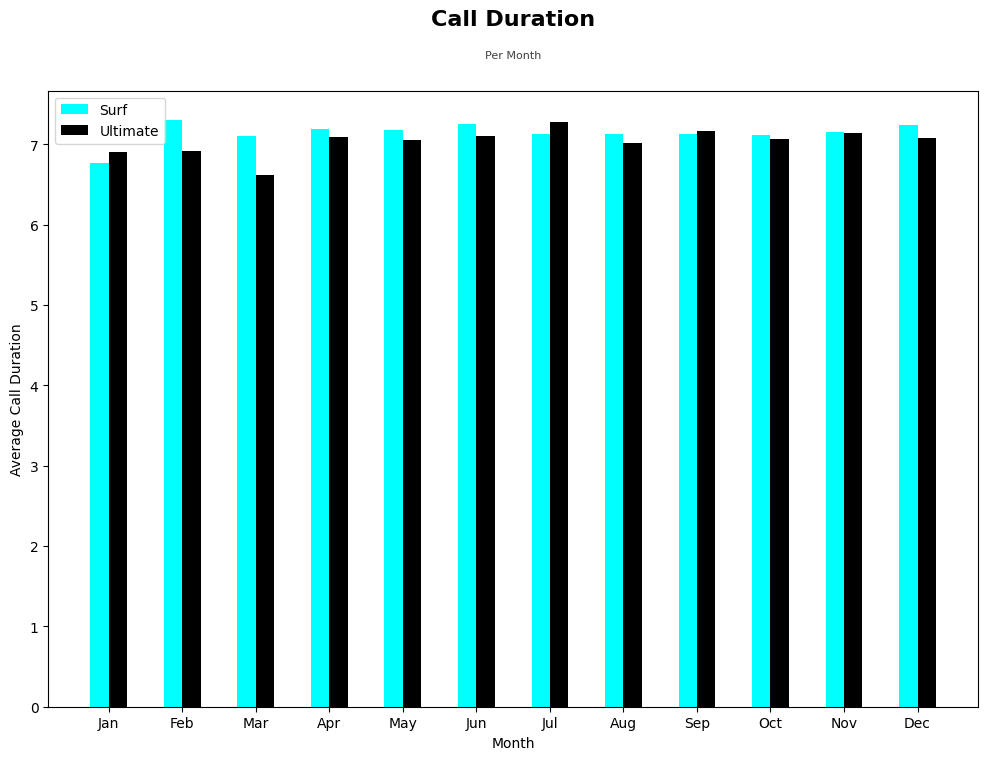

In [564]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.

# setting index to speficic columns for bar plot
minutes_per = minutes_per.set_index(['month_str', 'plan']).duration_mins_rounded

# calling plot and reindexing 'month_str'
fig, ax = plt.subplots(figsize=(12, 8))
minutes_per.unstack().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar', xlabel="Month",ylabel="Average Call Duration",
                    ylim=5.5, ax=ax,
                    color={'surf':'cyan','ultimate':'black'}, rot=0)


ax.autoscale()
ax.text(x=0.5, y=1.1, s='Call Duration', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Per Month', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)
plt.legend(['Surf', 'Ultimate'])
plt.show()


**`Comments`**

1. Average call duration for the Surf plan is higher on average than the Ultimate plan with higher deltas (or 'gaps') in the spring all the way until the summer where the Ultimate plan has an uptick in call averages and closes the gap to the Surf plan.

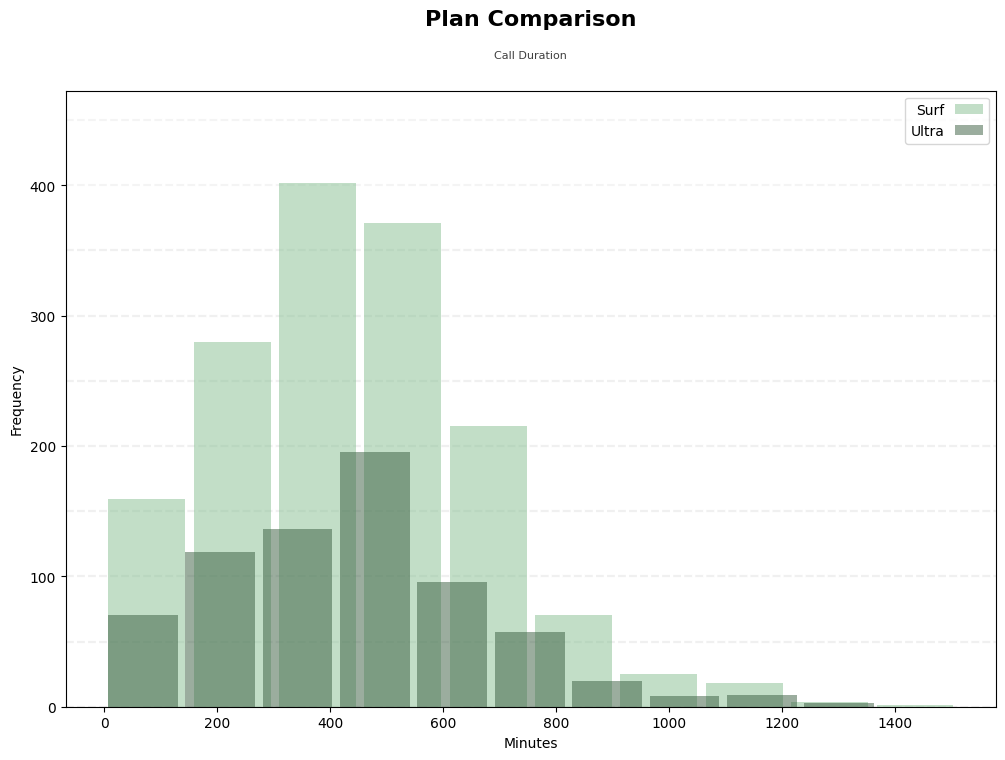

In [565]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.

# a little thrown off by the ask, there is no requirement for minute usage only an allowance
# making the assumption that this is asking for the frequency of the minute allowances per user on each plan
# or asking for the sum of minutes for each month (per plan) compared allowance to come up with a monthly 'requirement'

fig, ax = plt.subplots(figsize=(12, 8))

## creating a table with the date needed from the original DF
call_compare = megaline_df.loc[:,['user_id', 'minutes_spent','minute_allowance','month_str','plan']]

## filtering per plan for comparison
surf_filter = call_compare[call_compare['plan'] == 'surf'] 
ultimate_filter = call_compare[call_compare['plan'] == 'ultimate'] 

## storing the previous variable with a specific index
surf_calls_per = surf_filter.set_index(['month_str', 'plan']).minutes_spent.reset_index()
ultimate_calls_per = ultimate_filter.set_index(['month_str', 'plan']).minutes_spent.reset_index()

## creating variable housing the histogram
surf_min_hist = surf_calls_per.plot(kind='hist', alpha=0.5, color='#86bf91',zorder=2, rwidth=0.9,
                               #title='Surf Plan',
                               ax=ax)

## setting the labels and formatting 
# min_hist.set_ylabel("Minute Frequency", labelpad=20, size=12)
# min_hist.set_xlabel("Minute Duration", labelpad=20, size=12)

## removing the lines around the graph
# min_hist.spines['right'].set_visible(False)
# min_hist.spines['top'].set_visible(False)
# min_hist.spines['left'].set_visible(False)

## creating horizontal axis lines
values = surf_min_hist.get_yticks()
for tick in values:
    surf_min_hist.axhline(y=tick, linestyle='dashed', alpha=0.6, color='#eeeeee', zorder=1)

## recreating the above but with the ultimate plan, putting all the formatting code at the bottom
## set a ylimit to mirror the axis of the previous graph for an 'apples to apples' comp.
ult_min_hist = ultimate_calls_per.plot(kind='hist', alpha=0.5, color='#385c3f',
                                   zorder=2, rwidth=0.9,
                                   #title='Ultimate Plan',
                                   label={'minutes_spent': 'Ultimate'},
                                   ylim=(0,350), ax=ax)


## setting the labels and formatting 
# min_hist.set_ylabel("Minute Frequency", size=12)
ult_min_hist.set_xlabel("Minutes")


## removing the lines around the graph
# min_hist.spines['right'].set_visible(False)
# min_hist.spines['top'].set_visible(False)
# min_hist.spines['left'].set_visible(False)

## creating horizontal axis lines
values = ult_min_hist.get_yticks()
for tick in values:
    ult_min_hist.axhline(y=tick, linestyle='dashed', alpha=0.6, color='#eeeeee', zorder=1)


ax.autoscale()
ax.text(x=0.5, y=1.1, s='Plan Comparison', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Call Duration', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

handles, labels = ax.get_legend_handles_labels()
labels = ['Surf', 'Ultra']

ax.legend(handles, labels, loc = 'upper right', markerfirst = False)
# plt.legend(loc = 'upper right')
plt.show()


**`Comments`**

Minute Frequency Charts 
    
1. There seems to be greater activity of calls for the Surf plan based on the above graphs with peak duration in the 400-500 range (frequency drops off after the 500 minute allowance rate).
    
    
2. Under the Ultimate plan, there are way less number of calls (about half compared to Surf) and follow a similar path to the Surf plan with an upwards tick towards the 500 minute mark. We can see that while their allowance is much greater, the behavior is largely the same where the peak aligns throughout both data sets.
    

3. One may be able to conclude that the users under the Ultimate plan don't require as many minutes compared to those under the Surf plan. There is also twice as many Surf users compared to Ultimate users.    

In [566]:
# Calculate the mean and the variance of the monthly call duration

## creating variables to house the mean and the variance of monthly call duration
minutes_mean = calls_bar.groupby(['plan','month_str'])['duration_mins_rounded'].mean().reset_index().rename(columns={'duration_mins_rounded':'mean'})
minutes_var = calls_bar.groupby(['plan','month_str'])['duration_mins_rounded'].var().reset_index().rename(columns={'duration_mins_rounded':'variance'})
minutes_sum = calls_bar.groupby(['plan','month_str'])['duration_mins_rounded'].sum().reset_index()
#minutes_std = calls_bar.groupby(['plan','month_str'])['duration_mins_rounded'].std().reset_index().rename(columns={'duration_mins_rounded':'sum'})
#display(minutes_sum)

## merging both tables below into one on common identifiers
merged_min_stats = minutes_mean.merge(minutes_var,on=['plan','month_str'])
display(merged_min_stats)

,plan,month_str,mean,variance
0,surf,Apr,7.191899,34.754400
1,surf,Aug,7.124718,35.277344
2,surf,Dec,7.239358,36.014007
3,surf,Feb,7.303279,36.381743
4,surf,Jan,6.766667,28.995480
5,surf,Jul,7.124836,34.794517
6,surf,Jun,7.251863,36.481110
7,surf,Mar,7.106742,33.656824
8,surf,May,7.173700,35.962592
9,surf,Nov,7.160421,35.062130


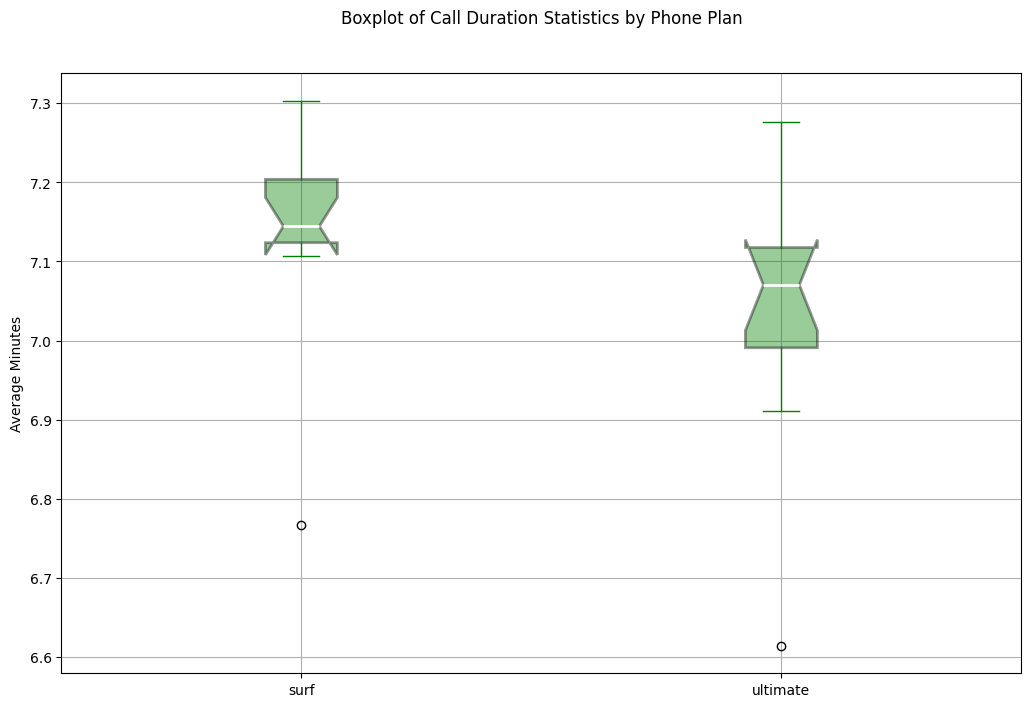

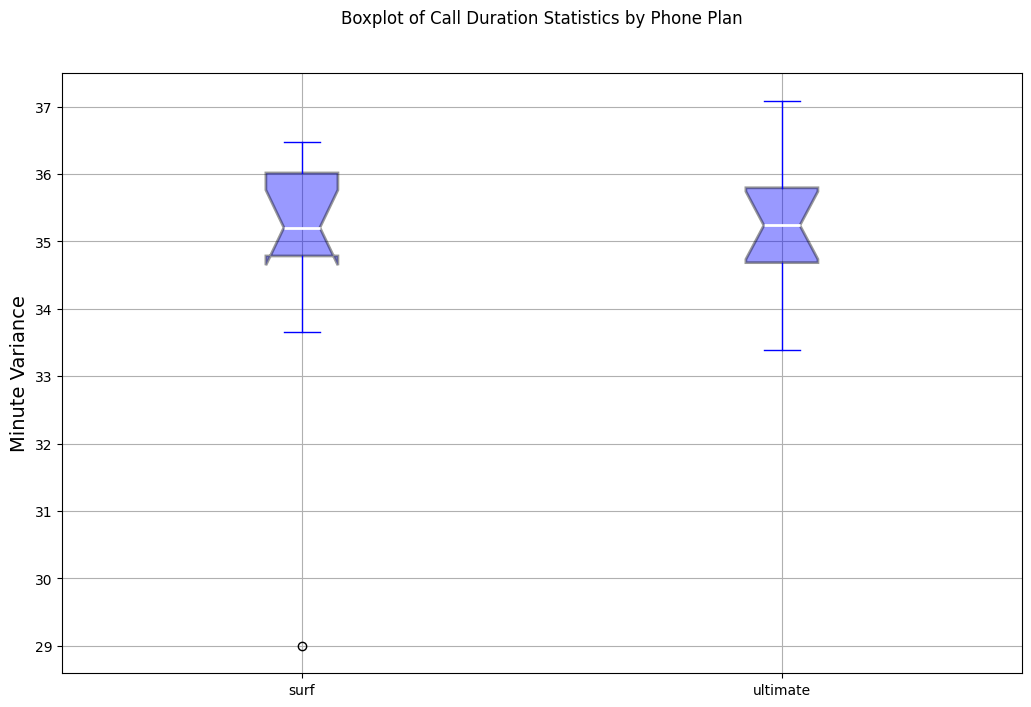

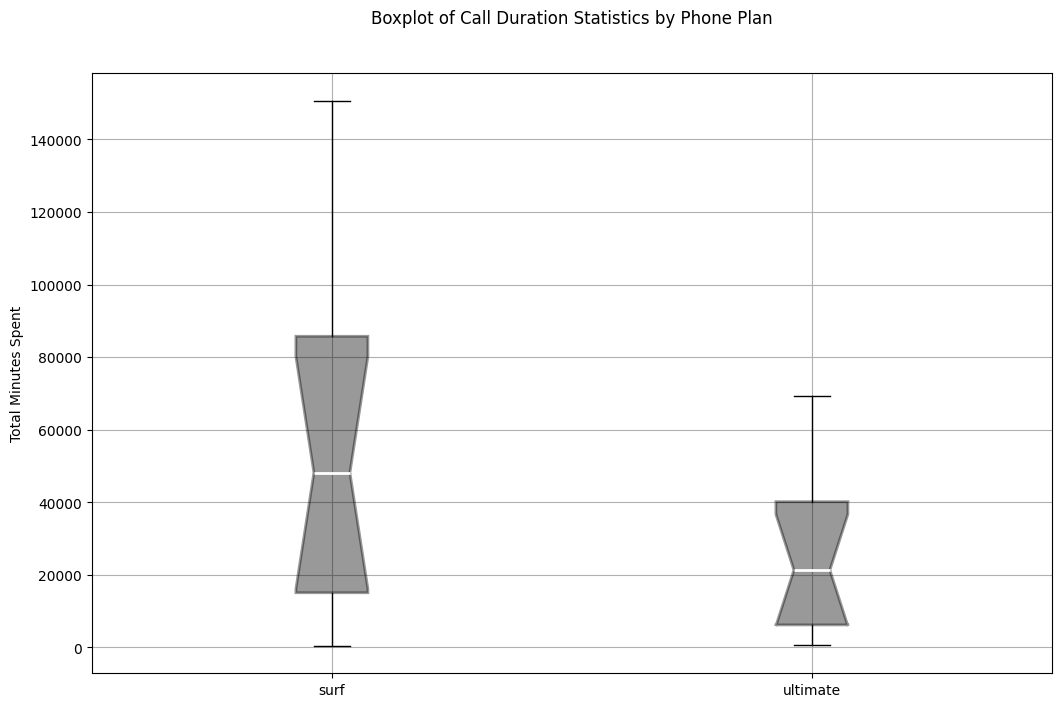

In [567]:
# Plot a boxplot to visualize the distribution of the monthly call duration

## creating variables to store the boxplots for the mean and the variance per plan
## splitting out per plan since ultimate analysis is plan vs plan
### mean view
ax = minutes_mean.boxplot(by='plan', figsize=(12,8),color='green',
                        patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='White'), 
                        notch=True,boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'green', alpha = .4))
plt.title('')
ax.set_xlabel('')
ax.set_ylabel('Average Minutes')

### variance view
ab = minutes_var.boxplot(by='plan', figsize=(12,8), color='blue',
                        patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='White'), 
                        notch=True,boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'blue', alpha = .4))
plt.title('')
ab.set_xlabel('')
ab.set_ylabel('Minute Variance',fontsize=14)

### sum view
ac = minutes_sum.boxplot(by='plan', figsize=(12,8), color='black',
                        patch_artist=True, medianprops = dict(linestyle='-', linewidth=2, color='White'), 
                        notch=True,boxprops = dict(linestyle='--', linewidth=2, color='Black', facecolor = 'black', alpha = .4))
plt.title('')
ac.set_xlabel('')
ac.set_ylabel('Total Minutes Spent')

## removing one the title for each boxplot
ax.get_figure().suptitle('Boxplot of Call Duration Statistics by Phone Plan')
ab.get_figure().suptitle('Boxplot of Call Duration Statistics by Phone Plan')
ac.get_figure().suptitle('Boxplot of Call Duration Statistics by Phone Plan')

plt.show()

**`Observations`**
    
Mean
    
1) The boxplot shows a positive skew for the surf plan vs the ultimate plan with a negative skew. This approximately matches the previous two graphs (higher frequency to the right of the mean of the surf plan and vice-versa). Average duration of calls is varied in the most positive quartile group for both.
    
2) The ultimate plan has higher dispersion (by having a longer interquartile range) and has a range of minutes with higher variability overall. This plan, comparatively, has more deviations than the Surf plan when it comes to the average number of minutes spent per user.
    
3) Both have outliers under the lower whisker (these data points originate from the following months: the month of March for the Ultimate plan and January for the Surf plan).
    
    
Variance
    
1) The boxplot shows a positive skew for the Surf plan vs the Ultimate plan with a normal distribution, converging towards the center. This can mean that there is much less variability under the Ultimate plan and the probability of a number being inside of the IQR is much greater. 
    
2) Median for both plans are relatively close to each other.
    
3) Interquartile range 'normalizes' compared to the mean boxplot, inching closer to the middle of the overall range of values.


Overall
    
1) The Surf plan has a much larger range of total minutes spent (or minute duration) by user. Meaning that users under this plan more spent more minutes on the phone than Ultimate users and concentrate the duration of calls in the 400-500 minute range (peak drops off after we get into the allowance mark; pricier overages under the Surf plan).
    
2) Users under the Ultimate plan spend less time on the phone even though their allowance is much greater than the Surf plan, so their overall usage is more spread out and less concentrated at the 400-500 minute range. 
    
3) One might make the assumption (without looking at the messaging or internet data) that Ultimate plan users rely on texting/internet communication more than actual voice calling. If this is true, one can then infer that the users of the Ultimate plan might be a more tech savy crowd (maybe even younger in age and willing to pair their expensive phone with the expensive plan that includes tons of messaging and data).
    
4) No outliers are present.

**Messages**

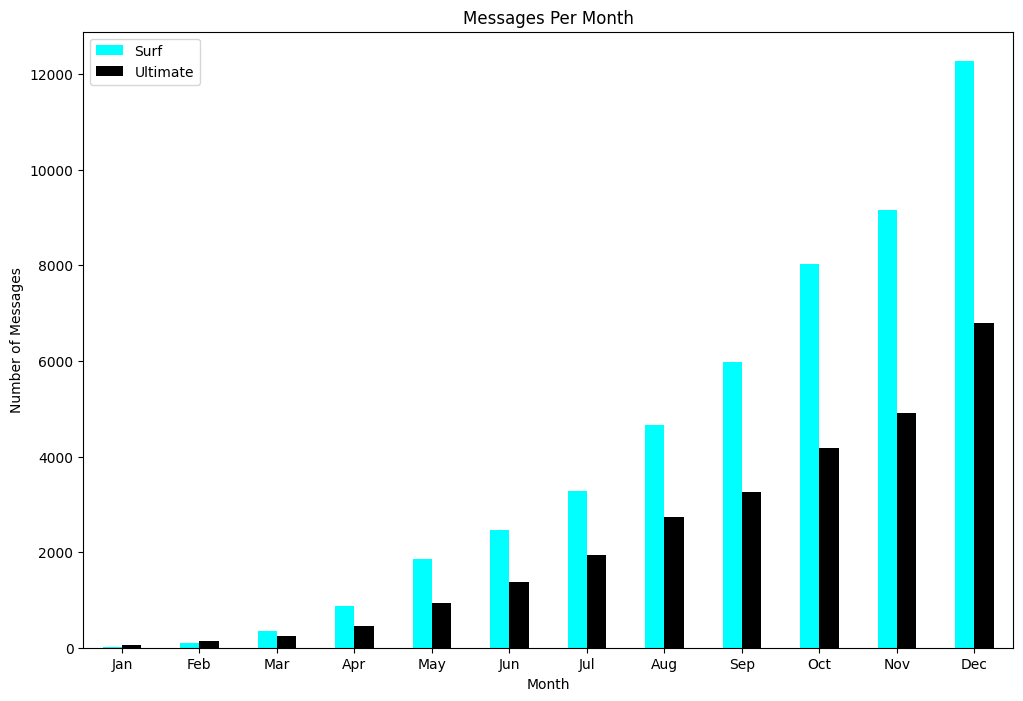

In [568]:
# Compare the number of messages users of each plan tend to send each month

messages_per = messages_per.set_index(['month_str', 'plan']).messages_sent

messages_per.unstack().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar',
                    xlabel="Month",ylabel="Number of Messages",
                    title='Messages Per Month',figsize=(12,8),
                    color={'surf':'cyan','ultimate':'black'}, rot=0)

plt.legend(['Surf', 'Ultimate'])
plt.show()

**MB**

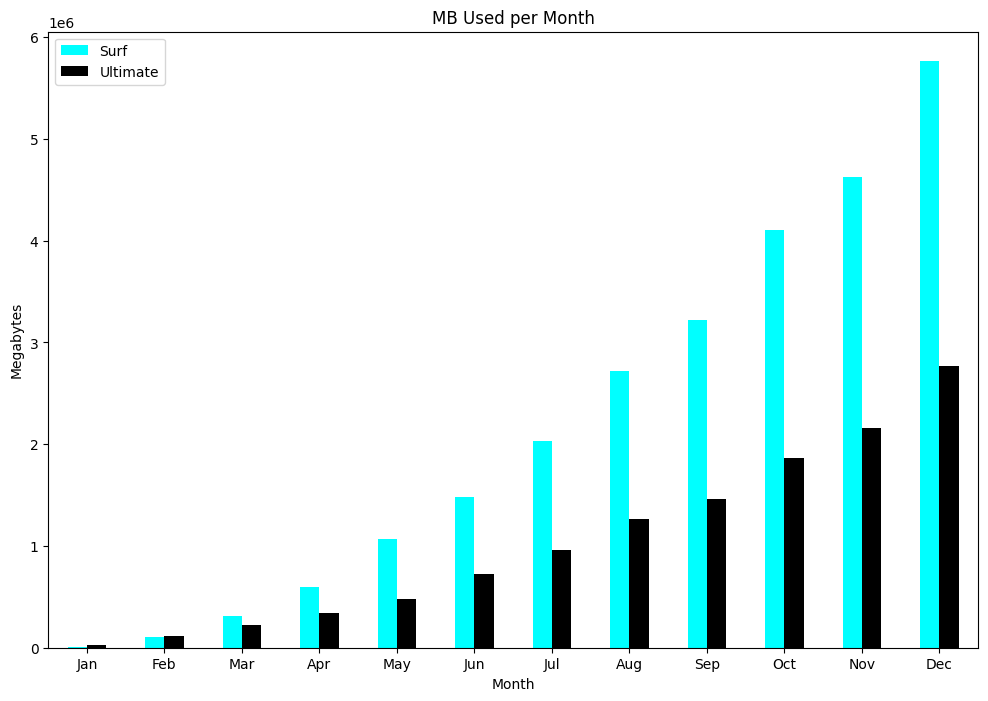

In [569]:
# Compare the amount of internet traffic consumed by users per plan

mb_per = mb_per.set_index(['month_str', 'plan']).mb_used

mb_per.unstack().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar',
                    xlabel="Month",ylabel="Megabytes",
                    title='MB Used per Month',figsize=(12,8),
                    color={'surf':'cyan','ultimate':'black'}, rot=0)

plt.legend(['Surf', 'Ultimate'])
plt.show()


**`Comments`**

Messaging
    
1) Messasing was consistent through both plans in the ramp up of messages sent from January to a December peak. 
    
2) Surf plan activity really picks up as the beginning of March all the way to December. 

3) One can make the assumption that text messaging picks up based on summer break as people are getting out of school (*opinion: more logical type of person to buy a prepaid plan*) and as holidays start coming by. 

>***Surf plan users really utilize their prepaid plan for text messaging even if the allowances are smaller. This could also be dependent on city weather/activities but we don't have that data available.***    

**Internet**

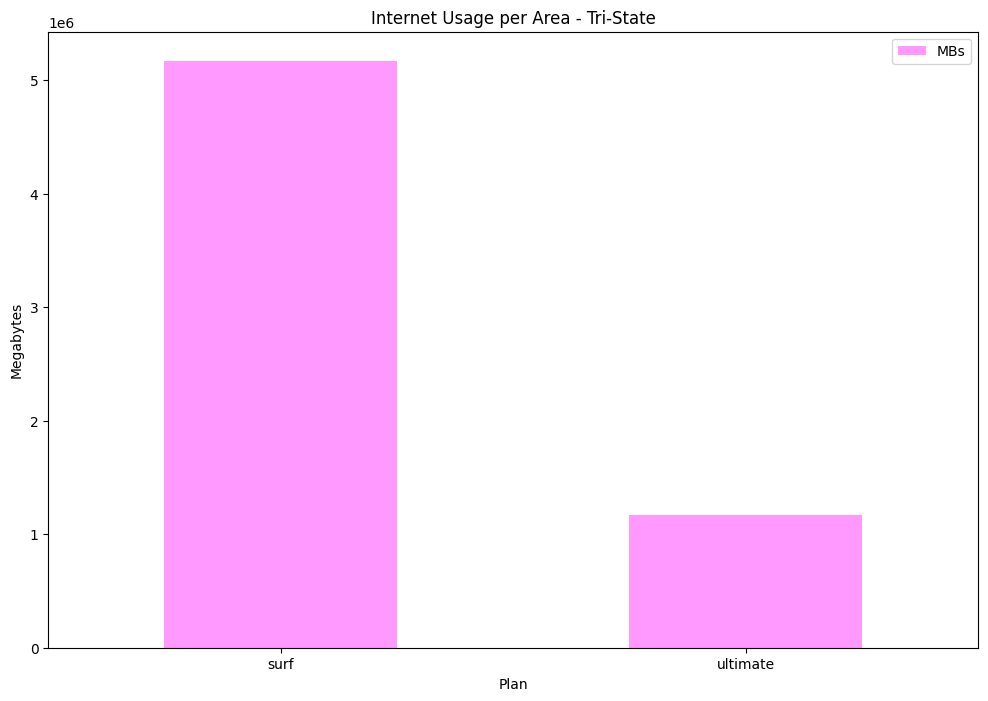

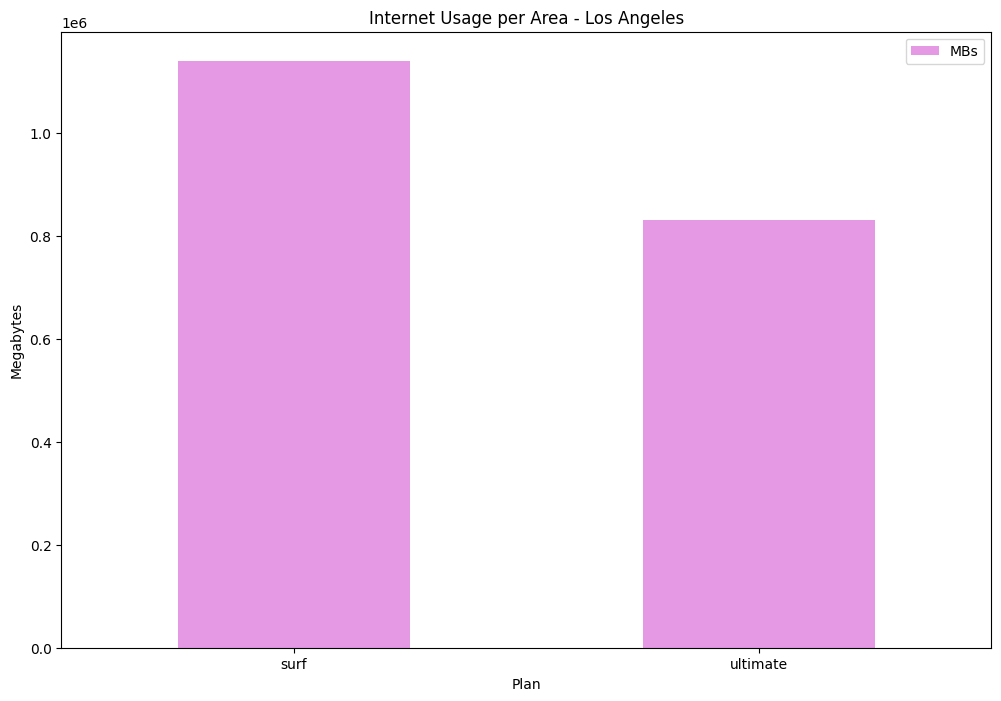

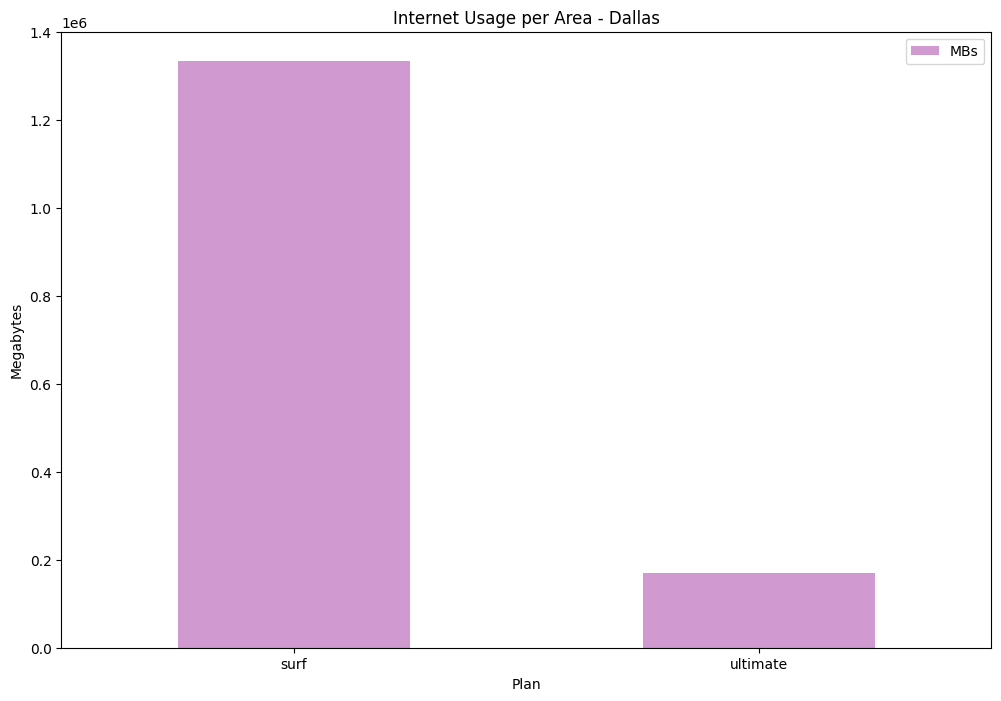

In [570]:
# Comparing the amount of MBs used per plan and per 'city' area (sample data)

mb_region_df_grp = mb_region_df.groupby(['plan','city'])['mb_used'].sum().reset_index()
#display(mb_region_df_grp)

# creating a filter for the tri-state area and LA area
mb_ny_filter = mb_region_df_grp[mb_region_df_grp['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
mb_la_filter = mb_region_df_grp[mb_region_df_grp['city'] == 'Los Angeles-Long Beach-Anaheim, CA MSA']
mb_da_filter = mb_region_df_grp[mb_region_df_grp['city'] == 'Dallas-Fort Worth-Arlington, TX MSA']

# tri-state plot
mb_ny_filter = mb_ny_filter.set_index(['plan']).mb_used
mb_ny_filter.plot(kind='bar',
                    title='Internet Usage per Area - Tri-State',figsize=(12,8),
                    color='magenta', rot=0, zorder=2, alpha=0.4)

# adjusting labels
plt.xlabel('Plan')



plt.ylabel('Megabytes')


plt.legend(['MBs'])
plt.show()

# los angeles plot
mb_la_filter = mb_la_filter.set_index(['plan']).mb_used
mb_la_filter.plot(kind='bar',
                    title='Internet Usage per Area - Los Angeles',figsize=(12,8),
                    color='m', rot=0, zorder=2, alpha=0.4)

# adjusting labels
plt.xlabel('Plan')


plt.ylabel('Megabytes')


plt.legend(['MBs'])
plt.show()

# dallas plot
mb_da_filter = mb_da_filter.set_index(['plan']).mb_used
mb_da_filter.plot(kind='bar',
                    title='Internet Usage per Area - Dallas',figsize=(12,8),
                    color='darkmagenta', rot=0, zorder=2, alpha=0.4)

# adjusting labels
plt.xlabel('Plan')



plt.ylabel('Megabytes')


plt.legend(['MBs'])
plt.show()

**`Comments`**

Internet

1) Very similar to text messaging, both plans show uptickets as we get into the end of spring with peaks towards the holiday season (end of the year).
    
2) Same exact relationship to text messaging in this sample, activity really picks up after March for the Surf plan while Ultimate users have a more steady uptick of data usage.
    
3) Along with the assumption that activity overall picks up due to summer breaks/holidays, one can also infer that slow activity at the beginning of the year is due to a) people going back to work, b) back home to a city away from family and c) new year 'resolutions' / holiday 'hangovers'.
    
4) While testing the regional data, we can see that out of the largest cities/areas that both plans are offered in, a larger percentage of users use the Surf plan vs the Ultimate plan. 
    
    > Internet usage is considerably higher with Surf users (they also take up 68% of the total sample size -- 500 users).

>***Surf plan users really utilize their prepaid plan for internet even if the allowances are smaller -- as text massaging ramp up, so does internet consumption. This could also be dependent on city weather/activities but we don't have that data available. Another interesting parameter would be analyzing the type of platforms people use when spending MBs (is it solely web browsing or can messaging via an app also be considered?)***    

`statistical differences between plan revenue`

,plan,call_revenue
0,surf,3186
1,ultimate,0


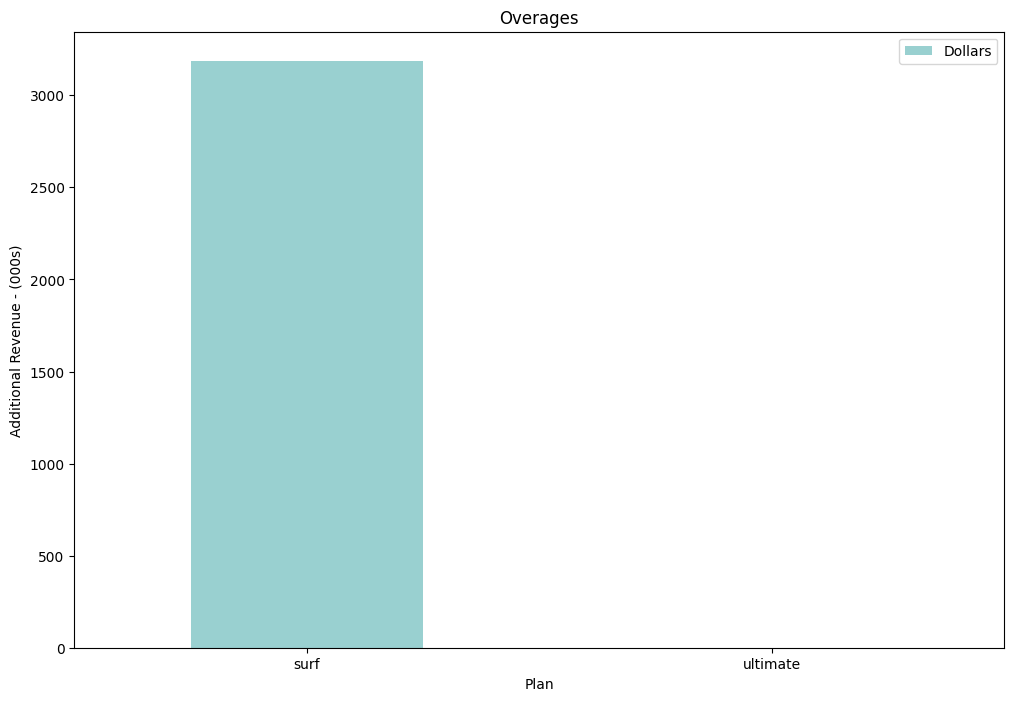

In [571]:
# Comparing revenue for phone calls (count)

# reference table
#display(revenue_df)

# grouping additional revenue per minute over allowance
add_phone_revenue = revenue_df.groupby('plan')['call_revenue'].sum().reset_index()
display(add_phone_revenue)

# creating a bar plot
add_phone_revenue.set_index('plan').plot(kind='bar',
                    title='Overages',figsize=(12,8),
                    color='darkcyan', rot=0, zorder=2, alpha=0.4)

plt.xlabel('Plan')



plt.ylabel('Additional Revenue - (000s)')


plt.legend(['Dollars'])
plt.show()

,plan,text_revenue
0,surf,513
1,ultimate,0


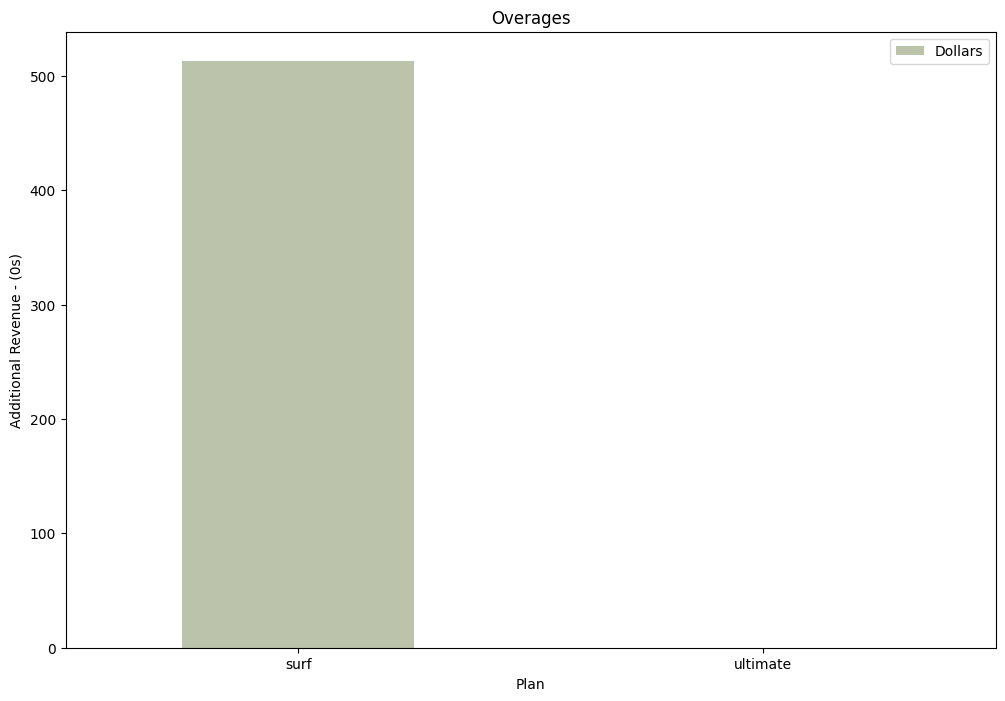

In [572]:
# Comparing revenue for text messaging (sum)

# reference table
#display(revenue_df)

# grouping additional revenue per minute over allowance
add_text_revenue = revenue_df.groupby('plan')['text_revenue'].sum().reset_index()
display(add_text_revenue)

# creating a bar plot
add_text_revenue.set_index('plan').plot(kind='bar',
                    title='Overages',figsize=(12,8),
                    color='darkolivegreen', rot=0, zorder=2, alpha=0.4)

plt.xlabel('Plan')


plt.ylabel('Additional Revenue - (0s)')


plt.legend(['Dollars'])
plt.show()

,plan,data_revenue
0,surf,55365.71610
1,ultimate,1518.07285


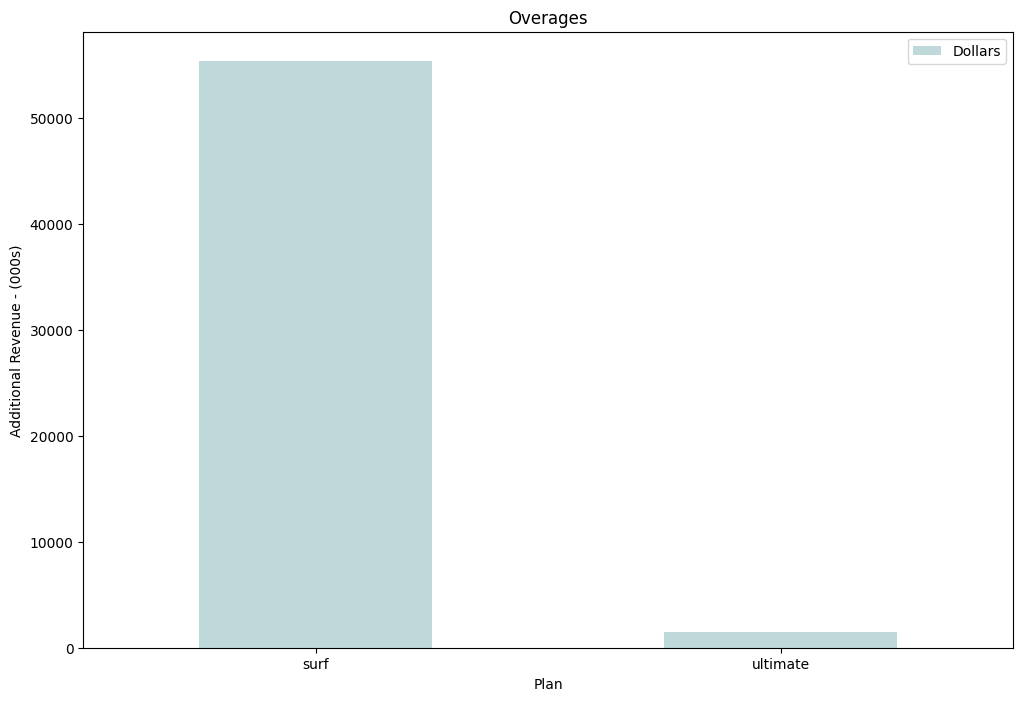

In [573]:
# Comparing revenue for internet usage (sum)

# reference table
#display(revenue_df)

# grouping additional revenue per minute over allowance
add_mb_revenue = revenue_df.groupby('plan')['data_revenue'].sum().reset_index()
display(add_mb_revenue)

# creating a bar plot
add_mb_revenue.set_index('plan').plot(kind='bar',
                    title='Overages',figsize=(12,8),
                    color='cadetblue', rot=0, zorder=2,alpha=0.4)

plt.xlabel('Plan')



plt.ylabel('Additional Revenue - (000s)')


plt.legend(['Dollars'])
plt.show()

,plan,total_user_average_rev
0,surf,90408
1,ultimate,51449


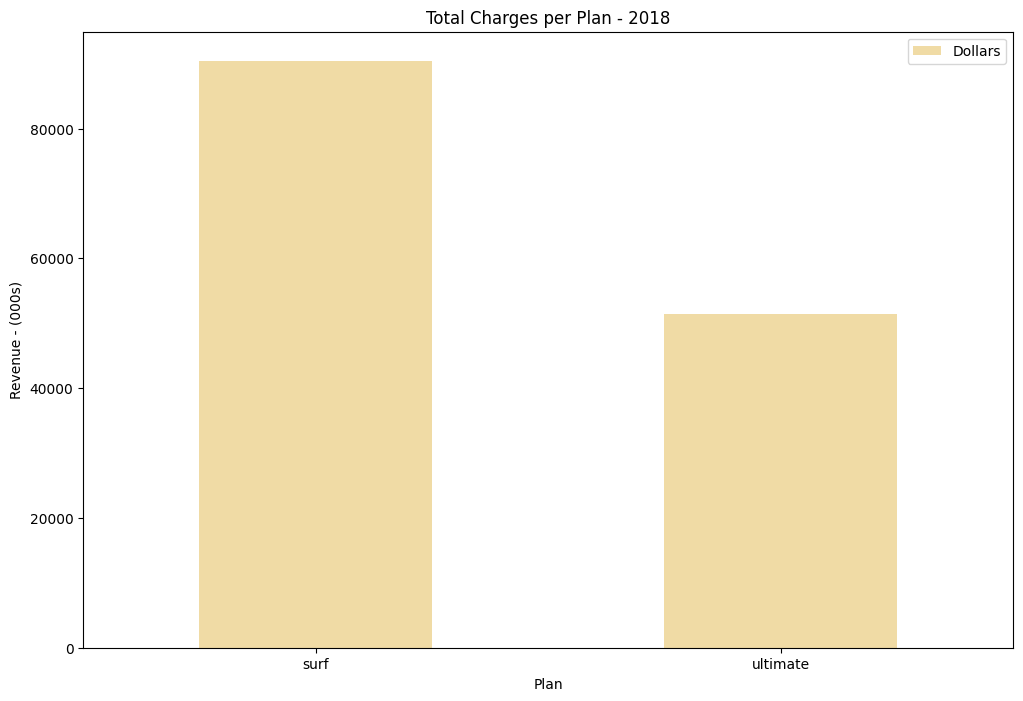

In [574]:
# Comparing total revenue per plan (including monthly charges)

# reference table
#display(revenue_df)

# grouping additional revenue per minute over allowance
## total_user_average_rev just means total revenue per month summed up to the yearly view, sorry if confusing
total_revenue = revenue_df.groupby('plan')['total_user_average_rev'].sum().reset_index()
display(total_revenue)

# creating a bar plot
total_revenue.set_index('plan').plot(kind='bar',
                    title='Total Charges per Plan - 2018',figsize=(12,8),
                    color='goldenrod', rot=0, zorder=2,  alpha=0.4)

plt.xlabel('Plan')


plt.ylabel('Revenue - (000s)')


plt.legend(['Dollars'])
plt.show()


**`Comments`**

Total Revenue

*After further analysis it seems that 19 users did not use their phone plan at all (481 out of 500). These were still charged a fee. These were added back into the DF since they had values in the Messages/MB dataframes.*
  
1. Overages are much higher on the Surf plan with almost double in additional revenue brought in by users surpassing the allowed rates. 
    
    
2. While there seems to be a decent cushion in text messaging (allowance is more than enough for most per month), internet overages take the cake with **55k in additional revenue alone from the Surf users** (who spent much more time web browsing; see the previous comparison bar plot).
    

3. Further analyzing the areas where these plans are offered, a significant volume of users reside in the larger cities where the User plan is far more popular.
    
    
4. With all of this said, the users aren't distributed evenly as one has to take into account the number of users in the sample data, we have approximately 67.8% of users originating from the Surf plan.


After data revisions
    
1. Believe my original data set was double counting a few things as I grouped then applied the calculations to get revenue. Did the opposite to get the monthly revenues for each month/user then grouping (I really hope I didn't mess it all up...).
    
2. New revenue data shows that Ultimate users bind themselves to the allowances and rarely surpass them (more than enough allowance for them) while Surf users surpassed their allowances in all of 2018 for both calling and messaging. 
    
    a) While these overages look stark in comparison to the Ultimate plan, these only accounted for 3k and 500 dollars respectively.
    

3. MB overages from the Surf users on the other hand really outpaced the overages from the Ultimate plan with 55k in additional revenue compared to 1.5k. 
    
    a) Surf plan MB overages accounts for ~61% of total plan revenue.


`hypotheses testing`

**`Comments`**

Plan Hypothesis

1. Designated the null hypothesis to be that the plan average revenue actually differes from each other. Alternative hypotheses is that they are both the same.
    

2. Alpha/significance value was to be set at 0.05.

    
3. Chose 3 statistical test to check the data (with the assumption that the equality test is the correct one to leverage). Attempted a paired sample test but as expected, they aren't of equal lengths.

    
4. Conclusion is the same in all three of the tests: averages betweens plan differ, data does not refute the null hypothesis.

In [575]:
# Testing the hypotheses, focusing on calling revenue since the comment called out 'calling plan' differentials. 
# Regardless, same story persists - averages are not equal and they differ.

# H₀ - averages between plans differ
# H₁ - averages between plans do not differ

# total revenue view / one-sided test
average_rev_surf = revenue_df[revenue_df['plan'] == 'surf']['total_user_average_rev'].mean()

rev_ultimate = revenue_df[revenue_df['plan'] == 'ultimate']['total_user_average_rev']

alpha = 0.05

results = st.ttest_1samp(rev_ultimate, average_rev_surf)

print('p-value: ', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (rev_ultimate.mean() < average_rev_surf):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")  
    
print()

# call revenue view / one-sided test
average_rev_call_surf = revenue_df[revenue_df['plan'] == 'surf']['call_revenue'].mean()
rev_call_ultimate = revenue_df[revenue_df['plan'] == 'ultimate']['call_revenue']

alpha = 0.05

results_call = st.ttest_1samp(rev_call_ultimate, average_rev_call_surf)

print('p-value: ', results_call.pvalue / 2)

if (results_call.pvalue / 2 < alpha) and (rev_call_ultimate.mean() < average_rev_call_surf):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

print()    

# call revenue view / equality
surf_calling_rev = revenue_df[revenue_df['plan'] == 'surf']['call_revenue']
ult_calling_rev = revenue_df[revenue_df['plan'] == 'ultimate']['call_revenue']

results_eq = st.ttest_ind(ult_calling_rev, surf_calling_rev, equal_var=False)

print('p-value:', results_eq.pvalue)

if (results_eq.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  4.334642136702321e-145
We can't reject the null hypothesis

p-value:  0.0
We reject the null hypothesis

p-value: 9.34843276531372e-83
We reject the null hypothesis


**`Comments`**

After re-running some of the code and my attempt at 'clean-up'. I now see that while total revenue average is indeed different between the plans, if we focus solely on the call revenue, we don't have enough evidence to say conclude that they are both different (makes sense since data set is relative small and even skewed towards a specific plan). This is shown by the last two tests.

`testing the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.`

**`Comments`**

City/Area Hypothesis

1. Designated the null hypothesis to be that the NY-NJ area average revenue is different than all other areas combined. Alternative hypotheses is that they are both one in the same.
    
    a) Second set of analysis focuses on NY-NJ area vs Phi-Cam-Wil area.
    

2. Alpha/significance value was to be set at 0.05.

    
3. Similar to the above tests, chose 3 statistical test to check the data (with the assumption that the equality test is the correct one to leverage). Attempted a paired sample test but as expected, they aren't of equal lengths.

    
4. Conclusion is the same in all three of the tests: the average revenue from the NY-NJ area differs, data does not refute the null hypothesis.

In [576]:
# Testing the hypotheses, focusing on NY-NJ area vs all others

# incorporating the city column into the revenue dataframe
revenue_region_merge = revenue_df.merge(users[['user_id','city']], on='user_id', how='left')
#display(revenue_region_merge)

# total revenue view / one-sided test
average_rev_ny = revenue_region_merge[revenue_region_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_user_average_rev'].mean()
#display(average_rev_ny)
average_rev_other = revenue_region_merge[revenue_region_merge['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_user_average_rev']
#display(average_rev_other)

alpha = 0.05

results_city = st.ttest_1samp(average_rev_other, average_rev_ny)

print('p-value: ', results_call.pvalue / 2)

if (results_city.pvalue / 2 < alpha) and (average_rev_other.mean() < average_rev_ny):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

print()    

# total revenue view / equality
average_rev_ny = revenue_region_merge[revenue_region_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_user_average_rev']
average_rev_other = revenue_region_merge[revenue_region_merge['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_user_average_rev']

results_eq = st.ttest_ind(average_rev_ny, average_rev_other, equal_var=False)

print('p-value:', results_eq.pvalue)

if (results_eq.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print()

p-value:  0.0
We can't reject the null hypothesis

p-value: 0.010383489200181787
We reject the null hypothesis



In [577]:
# Testing the hypotheses, focusing on NY-NJ area vs other specific areas

# incorporating the city column into the revenue dataframe
revenue_region_merge = revenue_df.merge(users[['user_id','city']], on='user_id', how='left')
#display(revenue_region_merge)

# total revenue view / one-sided test
average_rev_ny = revenue_region_merge[revenue_region_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_user_average_rev'].mean()
#display(average_rev_ny)
average_rev_phi = revenue_region_merge[revenue_region_merge['city'] == 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA']['total_user_average_rev']
#display(average_rev_phi)

alpha = 0.05

results_city = st.ttest_1samp(average_rev_phi, average_rev_ny)

print('p-value: ', results_call.pvalue / 2)

if (results_city.pvalue / 2 < alpha) and (average_rev_phi.mean() < average_rev_ny):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

print()    

# total revenue view / equality
average_rev_ny = revenue_region_merge[revenue_region_merge['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['total_user_average_rev']
average_rev_other = revenue_region_merge[revenue_region_merge['city'] == 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA']['total_user_average_rev']

results_eq = st.ttest_ind(average_rev_ny, average_rev_phi, equal_var=False)

print('p-value:', results_eq.pvalue)

if (results_eq.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

print()

p-value:  0.0
We can't reject the null hypothesis

p-value: 0.36627415286253184
We can't reject the null hypothesis



# Conclusion

My general conclusion from this analysis is that the Surf plan brings in more revenue (at the very least from the small sample of users), especially Data overages (data overages being the main driver of the total revenue difference). While the sample data has statistically more Surf users and therefore the values are elevated when comparing to the Ultimate users, the potential remains the same: there is likely probability that any additional revenue is/will be higher and come from overages in the Surf plan.

The Surf plan is far more popular in the metropolitan areas. This could be by a number of factors but on a limited view level (since we don't have any more parameters to analyze), those of younger age or different socio-economic background could get pulled in by the cheap, initial price and easy advertising (would assume a large portion of this is in the subways to start). They, after months of heavy texting and data usage, could not be realizing the overall extra charges that the plan brings. **It's very easy to forget how much data you're using on your phone, not to mention that it's sometimes tricky to even track it approriately!**

My suggestion would be to pursue this demographic of people in large metropolitan areas with heavier and modern advertising (we're all suckers for a well made ad.) especially if the prospective users are of a busy lifestyle (easier for them to forget to check their bills, monthly usage and/or fine line in cell phone contracts).